In [17]:
import talib as talib
import pandas as pd 
import numpy as np 
import alpaca_trade_api as alpaca_trade_api
import matplotlib.pyplot as plt
#from ..BaseAlpha import BaseAlpha
import datetime

In [7]:
base = BaseAlpha()
date=datetime.datetime.today()
df = base.getArrayFromBars('MSFT',28,date)

In [8]:

df[14:]

,close,open,high,low,volume
2019-12-18 00:00:00-05:00,154.37,154.2400,155.480,154.1800,14458613.0
2019-12-19 00:00:00-05:00,155.71,154.0100,155.770,153.7500,18017465.0
2019-12-20 00:00:00-05:00,157.39,157.3500,158.490,156.2900,38348544.0
2019-12-23 00:00:00-05:00,157.41,158.1200,158.120,157.2700,12592701.0
2019-12-24 00:00:00-05:00,157.39,157.4300,157.710,157.1150,5197207.0
2019-12-26 00:00:00-05:00,158.67,157.5600,158.730,157.4000,8748285.0
2019-12-27 00:00:00-05:00,158.95,159.4500,159.550,158.2200,12779354.0
2019-12-30 00:00:00-05:00,157.68,158.9865,159.020,156.7300,13421755.0
2019-12-31 00:00:00-05:00,157.49,156.7700,157.770,156.4500,12292639.0
2020-01-02 00:00:00-05:00,160.73,158.7400,160.730,158.3300,18902080.0


In [5]:
# def getRSI(df):
#     df=df.dropna()
#     # return the last element of the calculated RSI array
#     return talib.RSI(df['close'],timeperiod=len(df['close'])-1)[-1]
#talib.RSI(df['close'],timeperiod=14)
#base.getRSI(df['close'],14)
ar_close = np.array(df['close'][14:])
ar_close

array([154.54, 155.54, 154.79, 154.37, 155.71, 157.39, 157.41, 157.39,
       158.67, 158.95, 157.68, 157.49, 160.73, 158.59])

In [9]:
talib.ATR(df['high'],df['low'],df['close'])

2019-11-27 00:00:00-05:00         NaN
2019-11-29 00:00:00-05:00         NaN
2019-12-02 00:00:00-05:00         NaN
2019-12-03 00:00:00-05:00         NaN
2019-12-04 00:00:00-05:00         NaN
2019-12-05 00:00:00-05:00         NaN
2019-12-06 00:00:00-05:00         NaN
2019-12-09 00:00:00-05:00         NaN
2019-12-10 00:00:00-05:00         NaN
2019-12-11 00:00:00-05:00         NaN
2019-12-12 00:00:00-05:00         NaN
2019-12-13 00:00:00-05:00         NaN
2019-12-16 00:00:00-05:00         NaN
2019-12-17 00:00:00-05:00         NaN
2019-12-18 00:00:00-05:00    1.686064
2019-12-19 00:00:00-05:00    1.709917
2019-12-20 00:00:00-05:00    1.786351
2019-12-23 00:00:00-05:00    1.719469
2019-12-24 00:00:00-05:00    1.639150
2019-12-26 00:00:00-05:00    1.617782
2019-12-27 00:00:00-05:00    1.597226
2019-12-30 00:00:00-05:00    1.646710
2019-12-31 00:00:00-05:00    1.623374
2020-01-02 00:00:00-05:00    1.738847
2020-01-03 00:00:00-05:00    1.805358
2020-01-06 00:00:00-05:00    1.861404
2020-01-07 0

In [28]:
sim_res = pd.read_csv('gm_sim_results.csv')
sim_res.head()

,Unnamed: 0,Total Open,Total Closed,Total Won,Total Lost,Won Avg,Lost Avg,Strike Rate,Win Streak,Losing Streak,PnL Net,Period,Stoploss,Unnamed: 13
0,NaN,1,47,19,28,89.89,-64.29,40.43,3,8,-92.16,6,1.0,NaN
1,NaN,1,45,19,26,61.01,-54.51,42.22,3,7,-258.06,6,1.5,NaN
2,NaN,1,43,19,24,46.23,-46.83,44.19,3,7,-245.50,6,2.0,NaN
3,NaN,1,42,19,23,37.61,-37.55,45.24,3,7,-148.94,6,2.5,NaN
4,NaN,1,41,19,22,31.44,-33.83,46.34,3,6,-146.79,6,3.0,NaN


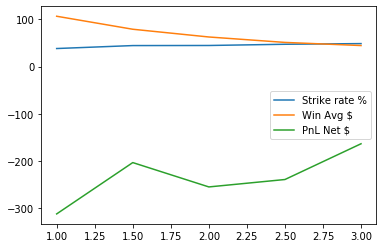

In [39]:
grp_period = sim_res.groupby(['Period']).mean()
grp_stoploss = sim_res.groupby(['Stoploss']).mean()

#GM seems like higher stoploss has higher strike rate
#Higher stoploss decrease total lost while keeping the total won unchaged
#Higher stoploss decrease the lost avg and descrease the won average
#plt.plot(grp['Strike Rate'])
#plt.plot(grp['Won Avg'])
#plt.plot(grp['PnL Net'])

plt.plot(grp_stoploss['Strike Rate'], label='Strike rate %')
plt.plot(grp_stoploss['Won Avg'],label='Win Avg $')
plt.plot(grp_stoploss['PnL Net'], label='PnL Net $')
plt.legend()

In [51]:
pd.pivot_table(sim_res,values='Strike Rate', index='Period',columns='Stoploss',aggfunc=np.mean)

Stoploss,1.0,1.5,2.0,2.5,3.0
Period,,,,,
6,40.43,42.22,44.19,45.24,46.34
7,37.50,41.67,45.45,46.88,48.39
8,35.71,38.46,40.54,41.67,42.86
9,37.84,41.18,42.42,43.75,43.33
10,39.47,42.86,42.86,44.12,43.75
11,42.42,48.28,50.00,51.85,52.00
12,45.45,51.72,53.57,55.56,56.00
13,41.94,53.85,52.00,54.17,54.55
14,43.75,55.56,53.85,56.00,56.52


In [52]:
pd.pivot_table(sim_res,values='Won Avg', index='Period',columns='Stoploss',aggfunc=np.mean)

Stoploss,1.0,1.5,2.0,2.5,3.0
Period,,,,,
6,89.89,61.01,46.23,37.61,31.44
7,96.60,74.19,57.56,47.30,40.05
8,76.13,54.12,41.57,34.10,28.68
9,86.42,60.24,45.55,37.01,31.52
10,82.17,57.02,43.45,35.25,29.85
11,102.86,72.65,55.68,45.38,38.94
12,98.05,69.05,52.93,43.09,36.78
13,85.10,57.90,47.13,38.46,33.23
14,91.67,61.95,50.02,40.77,35.12


In [79]:
## Nike
#With higher stoploss total wins and loss do not change
#With higher stoploss win avg decreases and lost avg decreases, pnl decreases
#Higher stoploss does not have higher strike rate
# Recommendation - Low Stoploss (1), period in range of 15-18
sim_res_nke = pd.read_csv('nike_sim_results.csv')
sim_res_nke.head()
pd.pivot_table(sim_res_nke,values=['Strike Rate','Total Won','Total Lost'], index='Period',columns='Stoploss',aggfunc=np.mean)

Strike Rate                             Total Lost                  \
Stoploss         1.0    1.5    2.0    2.5    3.0        1.0 1.5 2.0 2.5 3.0   
Period                                                                        
6              47.73  47.73  48.84  48.84  48.84         23  23  22  22  22   
7              47.22  47.22  47.22  47.22  47.22         19  19  19  19  19   
8              50.00  50.00  51.28  51.28  51.28         20  20  19  19  19   
9              60.00  57.14  58.82  58.82  58.82         14  15  14  14  14   
10             61.11  58.33  60.00  60.00  60.00         14  15  14  14  14   
11             62.07  60.71  60.71  60.71  60.71         11  11  11  11  11   
12             63.33  62.07  62.07  62.07  62.07         11  11  11  11  11   
13             63.33  63.33  63.33  63.33  63.33         11  11  11  11  11   
14             63.33  63.33  63.33  63.33  63.33         11  11  11  11  11   
15             65.52  65.52  65.52  65.52  65.52         10  10  10  10  10   
16             65.52  65.52  65.52  65.52  65.52         10  10  10  10  10   
17             61.54  66.67  66.67  66.67  66.67         10   8   8   8   8   
18             61.54  69.57  69.57  69.57  69.57         10   7   7   7   7   
19             56.52  68.42  68.42  68.42  68.42         10   6   6   6   6   
20             56.52  68.42  68.42  68.42  68.42         10   6   6   6   6   
21             50.00  60.00  60.00  60.00  60.00         11   8   8   8   8   
22             47.62  57.89  57.89  57.89  57.89         11   8   8   8   8   
23             55.00  61.11  61.11  61.11  61.11          9   7   7   7   7   
24             52.63  61.11  61.11  61.11  61.11          9   7   7   7   7   
25             50.00  55.00  55.00  55.00  55.00         10   9   9   9   9   
26             50.00  57.89  57.89  57.89  57.89         10   8   8   8   8   
27             47.37  55.56  55.56  55.56  55.56         10   8   8   8   8   
28             44.44  52.94  52.94  52.94  52.94         10   8   8   8   8   

         Total Won                  
Stoploss       1.0 1.5 2.0 2.5 3.0  
Period                              
6               21  21  21  21  21  
7               17  17  17  17  17  
8               20  20  20  20  20  
9               21  20  20  20  20  
10              22  21  21  21  21  
11              18  17  17  17  17  
12              19  18  18  18  18  
13              19  19  19  19  19  
14              19  19  19  19  19  
15              19  19  19  19  19  
16              19  19  19  19  19  
17              16  16  16  16  16  
18              16  16  16  16  16  
19              13  13  13  13  13  
20              13  13  13  13  13  
21              11  12  12  12  12  
22              10  11  11  11  11  
23              11  11  11  11  11  
24              10  11  11  11  11  
25              10  11  11  11  11  
26              10  11  11  11  11  
27               9  10  10  10  10  
28               8   9   9   9   9

In [81]:
sim_res_f = pd.read_csv('f_sim_results.csv')
pd.pivot_table(sim_res_f,values=['Strike Rate','Total Won','Total Lost','PnL Net'], index='Period',columns='Stoploss',aggfunc=np.mean)

PnL Net                                 Strike Rate                \
Stoploss     1.0     1.5     2.0     2.5     3.0         1.0    1.5    2.0   
Period                                                                       
6        -221.52 -178.44   51.29   18.30    8.55       43.18  45.24  48.72   
7         -41.91  -87.28  -42.15   10.90  -21.29       47.50  50.00  51.35   
8         -39.45  -85.50  -40.81   12.01  -10.79       46.34  48.72  50.00   
9        -275.99 -411.41 -247.00  -17.85  -31.90       45.45  46.88  51.72   
10       -317.46 -394.12 -192.56  -96.36 -100.22       44.12  45.45  50.00   
11       -432.17 -402.93 -135.53  -93.90 -108.74       44.12  41.94  46.43   
12       -344.52 -370.94 -109.78  -72.59  -91.04       44.12  43.75  48.28   
13        -87.35 -134.21   51.66   -4.37  -34.56       42.42  41.94  46.43   
14         22.75  -61.66  107.35   39.35    1.57       42.42  41.94  46.43   
15        179.21  118.28  133.03  119.74  119.83       46.67  48.15  52.00   
16        105.93   97.41  119.18  108.10  111.94       48.28  48.00  52.17   
17         48.26   15.46  157.82  179.45  187.67       41.94  42.86  48.00   
18        149.66  -12.11  105.80  114.86  115.31       45.16  44.83  50.00   
19       -333.75 -415.39 -215.23  -92.00 -144.69       41.38  44.44  52.17   
20       -333.75 -415.39 -215.23  -92.00 -144.69       41.38  44.44  52.17   
21       -655.15 -615.34 -419.84 -259.59 -280.81       35.71  40.00  45.45   
22       -455.64 -450.60 -366.83 -176.60 -211.91       37.04  41.67  45.45   
23        -33.64 -112.05 -204.06  -45.08 -102.43       48.00  52.17  52.17   
24         66.96  -11.80 -105.88  -32.15  -93.21       50.00  54.55  54.55   
25         77.97   -9.18  -81.02    6.99  -44.84       47.83  55.00  55.00   
26         77.97   -9.18  -81.02    6.99  -44.84       47.83  55.00  55.00   
27        241.81  237.83  133.89  141.26   69.03       50.00  58.82  58.82   
28        224.43  156.28   74.59   94.16   28.88       50.00  56.25  56.25   

                       Total Lost                 Total Won                  
Stoploss    2.5    3.0        1.0 1.5 2.0 2.5 3.0       1.0 1.5 2.0 2.5 3.0  
Period                                                                       
6         48.72  48.72         25  23  20  20  20        19  19  19  19  19  
7         51.43  52.94         21  19  18  17  16        19  19  19  18  18  
8         50.00  51.43         22  20  19  18  17        19  19  19  18  18  
9         57.69  60.00         18  17  14  11  10        15  15  15  15  15  
10        53.57  55.56         19  18  15  13  12        15  15  15  15  15  
11        48.15  50.00         19  18  15  14  13        15  13  13  13  13  
12        50.00  51.85         19  18  15  14  13        15  14  14  14  14  
13        46.43  48.15         19  18  15  15  14        14  13  13  13  13  
14        46.43  48.15         19  18  15  15  14        14  13  13  13  13  
15        50.00  52.17         16  14  12  12  11        14  13  13  12  12  
16        50.00  52.38         15  13  11  11  10        14  12  12  11  11  
17        47.83  50.00         18  16  13  12  11        13  12  12  11  11  
18        50.00  52.17         17  16  13  12  11        14  13  13  12  12  
19        55.00  55.00         17  15  11   9   9        12  12  12  11  11  
20        55.00  55.00         17  15  11   9   9        12  12  12  11  11  
21        47.37  47.37         18  15  12  10  10        10  10  10   9   9  
22        52.63  52.63         17  14  12   9   9        10  10  10  10  10  
23        60.00  60.00         13  11  11   8   8        12  12  12  12  12  
24        60.00  60.00         12  10  10   8   8        12  12  12  12  12  
25        61.11  61.11         12   9   9   7   7        11  11  11  11  11  
26        61.11  61.11         12   9   9   7   7        11  11  11  11  11  
27        62.50  62.50         11   7   7   6   6        11  10  10  10  10  
28        60.00  60.00        

In [82]:
 #f_20180101-20180630_sim_results.csv
sim_res_f1 = pd.read_csv('f_20180101-20180630_sim_results.csv')
pd.pivot_table(sim_res_f1,values=['Strike Rate','Total Won','Total Lost','PnL Net'], index='Period',columns='Stoploss',aggfunc=np.mean)

PnL Net                                 Strike Rate                \
Stoploss     1.0     1.5     2.0     2.5     3.0         1.0    1.5    2.0   
Period                                                                       
6        -554.45 -396.70 -280.25 -219.03 -199.13       25.00  34.78  31.82   
7        -520.65 -385.45 -293.96 -188.21 -173.45       21.05  33.33  33.33   
8        -520.65 -385.45 -293.96 -188.21 -173.45       21.05  33.33  33.33   
9        -541.01 -399.43 -370.62 -269.95 -258.04       22.22  35.29  37.50   
10       -620.67 -453.85 -411.42 -302.99 -285.47       20.00  31.58  33.33   
11       -432.87 -326.31 -289.00 -221.69 -217.63       26.32  29.41  31.25   
12       -617.15 -520.72 -464.27 -346.64 -323.22       19.05  21.05  22.22   
13       -436.46 -460.02 -419.95 -309.16 -291.19       22.22  23.53  23.53   
14       -436.46 -460.02 -419.95 -309.16 -291.19       22.22  23.53  23.53   
15       -455.64 -472.45 -426.75 -308.36 -292.24       22.22  23.53  23.53   
16       -359.46 -376.46 -327.70 -270.08 -260.31       23.53  25.00  25.00   
17       -258.98 -277.27 -228.61 -160.27 -149.65       26.67  28.57  28.57   
18       -258.98 -277.27 -228.61 -160.27 -149.65       26.67  28.57  28.57   
19         53.73  -96.67  -98.23   38.29   17.05       38.46  38.46  38.46   
20         53.73  -96.67  -98.23   38.29   17.05       38.46  38.46  38.46   
21        135.69  -76.19 -107.63  111.84   77.67       41.67  41.67  41.67   
22        135.69  -76.19 -107.63  111.84   77.67       41.67  41.67  41.67   
23        142.29  -71.30 -100.81  117.07   82.21       45.45  45.45  45.45   
24        142.29  -71.30 -100.81  117.07   82.21       45.45  45.45  45.45   
25        190.88  -39.59  -77.49  136.60   98.41       50.00  50.00  50.00   
26        294.23   60.88  -53.84  155.50  114.97       55.56  55.56  55.56   
27        113.80  -23.66  -92.60   39.59   17.15       50.00  50.00  50.00   
28        113.80  -23.66  -92.60   39.59   17.15       50.00  50.00  50.00   

                       Total Lost                 Total Won                  
Stoploss    2.5    3.0        1.0 1.5 2.0 2.5 3.0       1.0 1.5 2.0 2.5 3.0  
Period                                                                       
6         33.33  33.33         18  15  15  14  14         6   8   7   7   7  
7         31.25  31.25         15  12  12  11  11         4   6   6   5   5  
8         31.25  31.25         15  12  12  11  11         4   6   6   5   5  
9         35.71  35.71         14  11  10   9   9         4   6   6   5   5  
10        31.25  31.25         16  13  12  11  11         4   6   6   5   5  
11        26.67  26.67         14  12  11  11  11         5   5   5   4   4  
12        18.75  18.75         17  15  14  13  13         4   4   4   3   3  
13        20.00  20.00         14  13  13  12  12         4   4   4   3   3  
14        20.00  20.00         14  13  13  12  12         4   4   4   3   3  
15        20.00  20.00         14  13  13  12  12         4   4   4   3   3  
16        26.67  26.67         13  12  12  11  11         4   4   4   4   4  
17        23.08  23.08         11  10  10  10  10         4   4   4   3   3  
18        23.08  23.08         11  10  10  10  10         4   4   4   3   3  
19        45.45  45.45          8   8   8   6   6         5   5   5   5   5  
20        45.45  45.45          8   8   8   6   6         5   5   5   5   5  
21        55.56  55.56          7   7   7   4   4         5   5   5   5   5  
22        55.56  55.56          7   7   7   4   4         5   5   5   5   5  
23        62.50  62.50          6   6   6   3   3         5   5   5   5   5  
24        62.50  62.50          6   6   6   3   3         5   5   5   5   5  
25        71.43  71.43          5   5   5   2   2         5   5   5   5   5  
26        83.33  83.33          4   4   4   1   1         5   5   5   5   5  
27        66.67  66.67          4   4   4   2   2         4   4   4   4   4  
28        66.67  66.67        

In [83]:
#f_20180630-20181230_sim_results.csv
sim_res_f2 = pd.read_csv('f_20180630-20181230_sim_results.csv')
pd.pivot_table(sim_res_f2,values=['Strike Rate','Total Won','Total Lost','PnL Net'], index='Period',columns='Stoploss',aggfunc=np.mean)

PnL Net                                 Strike Rate                \
Stoploss     1.0     1.5     2.0     2.5     3.0         1.0    1.5    2.0   
Period                                                                       
6        -422.60 -412.23 -356.58 -306.36 -271.88       12.50  12.50  13.33   
7        -304.76 -340.49 -305.40 -268.65 -243.06       20.00  21.43  23.08   
8        -304.76 -340.49 -305.40 -268.65 -243.06       20.00  21.43  23.08   
9        -317.88 -349.25 -279.22 -246.49 -224.13       25.00  26.67  21.43   
10       -333.22 -359.64 -286.72 -253.17 -229.73       23.53  25.00  20.00   
11       -611.25 -644.02 -568.77 -521.08 -493.36       12.50  14.29  15.38   
12       -611.25 -644.02 -568.77 -521.08 -493.36       12.50  14.29  15.38   
13       -686.96 -547.54 -283.73 -248.56 -224.99        0.00   0.00  11.11   
14       -686.96 -547.54 -436.92 -352.33 -295.38        0.00   0.00   0.00   
15       -672.05 -537.28 -429.35 -346.37 -290.07        0.00   0.00   0.00   
16       -672.05 -537.28 -429.35 -346.37 -290.07        0.00   0.00   0.00   
17       -530.96 -444.46 -369.29 -333.80 -309.87       20.00  22.22  12.50   
18       -530.96 -444.46 -369.29 -333.80 -309.87       20.00  22.22  12.50   
19       -619.82 -631.13 -357.45 -336.81 -340.06       20.00  25.00  33.33   
20       -619.82 -631.13 -357.45 -336.81 -340.06       20.00  25.00  33.33   
21       -619.82 -631.13 -521.73 -468.10 -434.96       20.00  25.00  14.29   
22       -619.82 -631.13 -521.73 -468.10 -434.96       20.00  25.00  14.29   
23       -529.52 -500.65 -470.21 -471.39 -472.81       20.00  25.00  14.29   
24       -529.52 -500.65 -470.21 -471.39 -472.81       20.00  25.00  14.29   
25       -404.44 -385.34 -252.30 -298.26 -329.09       22.22  28.57  50.00   
26       -404.44 -385.34 -252.30 -298.26 -329.09       22.22  28.57  50.00   
27       -307.76 -395.89 -264.89 -309.23 -339.69       25.00  28.57  50.00   
28       -307.76 -395.89 -264.89 -309.23 -339.69       25.00  28.57  50.00   

                       Total Lost                 Total Won                  
Stoploss    2.5    3.0        1.0 1.5 2.0 2.5 3.0       1.0 1.5 2.0 2.5 3.0  
Period                                                                       
6         13.33  13.33         14  14  13  13  13         2   2   2   2   2  
7         23.08  23.08         12  11  10  10  10         3   3   3   3   3  
8         23.08  23.08         12  11  10  10  10         3   3   3   3   3  
9         21.43  21.43         12  11  11  11  11         4   4   3   3   3  
10        20.00  20.00         13  12  12  12  12         4   4   3   3   3  
11        15.38  15.38         14  12  11  11  11         2   2   2   2   2  
12        15.38  15.38         14  12  11  11  11         2   2   2   2   2  
13        11.11  11.11         12  11   8   8   8         0   0   1   1   1  
14         0.00   0.00         12  11  10  10  10         0   0   0   0   0  
15         0.00   0.00         11  10   9   9   9         0   0   0   0   0  
16         0.00   0.00         11  10   9   9   9         0   0   0   0   0  
17        12.50  12.50          8   7   7   7   7         2   2   1   1   1  
18        12.50  12.50          8   7   7   7   7         2   2   1   1   1  
19        33.33  33.33          8   6   4   4   4         2   2   2   2   2  
20        33.33  33.33          8   6   4   4   4         2   2   2   2   2  
21        14.29  14.29          8   6   6   6   6         2   2   1   1   1  
22        14.29  14.29          8   6   6   6   6         2   2   1   1   1  
23        14.29  14.29          8   6   6   6   6         2   2   1   1   1  
24        14.29  14.29          8   6   6   6   6         2   2   1   1   1  
25        50.00  50.00          7   5   3   3   3         2   2   3   3   3  
26        50.00  50.00          7   5   3   3   3         2   2   3   3   3  
27        50.00  50.00          6   5   3   3   3         2   2   3   3   3  
28        50.00  50.00        